In [10]:
# import python libraries for the simulation

import numba
import numpy as np
from random import random
import time done
from matplotlib import pyplot as plt, colors, animation

In [11]:
# gathering information for initializing the forest

UNOCUPPIED = 0 # represents an area on the site unoccupied by a tree
TREE_WITHOUT_FIRE = 1 # represents an area on the site with tree but no fire 
TREE_WITH_FIRE = 2 # represents an area on the site with a tree and fire

probTree = 0.8 # the probability that a tree ocupies the site area
probBurning = 0.01 # the probability that a tree is burning
probImmune = 0.3 # the probability that a tree does not burn and is immune to fire
probLightning = 0.001 # the probability that the site area suffered lightning strikes

Non Parallel Forest Fire Spread Simulation

In [12]:
def InitForestSite(n):
    # make the initial forest site of size nXn unocupied before we fill
    forest = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            # for each site, randomly assign a tree or unoccupied
            # if the random number is less than the probability of a tree, 
                # and the random number is less than the probability of a burning tree,
                # then the value tree with fire is assigned otherwise a tree without fire is assigned
            # otherwise the value of unoccupied is assigned            
            if random() < probTree:
                if random() < probBurning:
                    forest[i, j] = TREE_WITH_FIRE
                else:
                    forest[i, j] = TREE_WITHOUT_FIRE
            else:
                forest[i, j] = UNOCUPPIED
                
    return forest

In [13]:
# the moore neighborhood algorithm has 8 neighbors, 
# north, south, east, west, north-east, north-west, south-east, south-west
# we will check if any other the neighbours of a tree are burning, 
# if so, the tree will burn if it is not immune
# we will check if the site area is lightning struck, 
# if so the tree will catch fire if it's not immune

# we will also check if the tree in site area is under fire, 
# if so, the tree will burn to the ground.
# unoccupied site areas will not be affected by the fire spreading

def FireSpreadingWithMooreAlgorithm(forest, n):
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            if forest[i, j] == TREE_WITHOUT_FIRE:                
                if (forest[i-1, j] == TREE_WITH_FIRE or forest[i+1, j] == TREE_WITH_FIRE 
                    or forest[i, j-1] == TREE_WITH_FIRE or forest[i, j+1] == TREE_WITH_FIRE 
                    or forest[i-1, j-1] == TREE_WITH_FIRE or forest[i-1, j+1] == TREE_WITH_FIRE 
                    or forest[i+1, j-1] == TREE_WITH_FIRE or forest[i+1, j+1] == TREE_WITH_FIRE
                    ):
                    if random() < probImmune:
                        forest[i, j] = TREE_WITHOUT_FIRE
                    else:
                        forest[i, j] = TREE_WITH_FIRE
                
                elif random() < probLightning:
                    if random() < probImmune:
                        forest[i, j] = TREE_WITHOUT_FIRE
                    else:
                        forest[i, j] = TREE_WITH_FIRE
                        
                # nothing to cause a fire, so the tree remains without fire
                else:
                    forest[i, j] = TREE_WITHOUT_FIRE
            
            elif forest[i, j] == TREE_WITH_FIRE:
                forest[i, j] = UNOCUPPIED
            else:
                forest[i, j] = UNOCUPPIED              
                
    return forest

In [14]:
def ExtendSiteBoundaries(forest, n):
    # extend the site boundaries by one row and column
    # to avoid boundary effects when checking the neighbors 
    # at the site boundaries
    
    extendedForest = np.row_stack((forest[0, :], forest, forest[-1, :]))
    extendedForest = np.column_stack((extendedForest[:, 0], extendedForest, extendedForest[:, -1]))
    
    # spread the fire in the extended site
    extendedForest = FireSpreadingWithMooreAlgorithm(extendedForest, n)
    
    # strip away the extended site boundaries
    forest = extendedForest[1:n + 1, 1:n + 1]
    
    # return the forest site
    return forest
    

Non Parallel Total Runtime for site 100:  0.08299779891967773


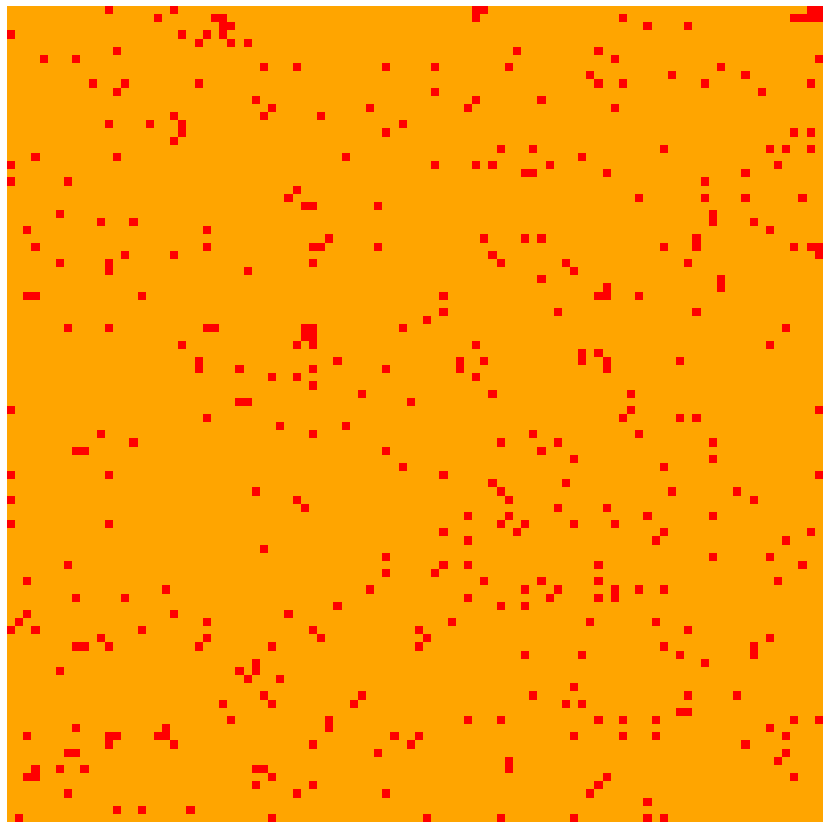

In [19]:
initialTime = time.time()

forestSite = InitForestSite(100)

# doing this to measure the time taken to run the simulation
# for a single time step
ExtendSiteBoundaries(forestSite, 100)

TotalRuntime = time.time() - initialTime
print("Non Parallel Total Runtime for site 100: ", TotalRuntime)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.set_axis_off()

# orange represents unoccupied site areas, green represents trees without fire,
# red represents trees with fire
im = ax.imshow(forestSite, cmap=colors.ListedColormap(['orange', 'green', 'red', 'brown']))
    
def updateAnimation(i):
    im.set_array(updateAnimation.site)
    
    updateAnimation.site = ExtendSiteBoundaries(updateAnimation.site, 100)
    
    return im,

updateAnimation.site = forestSite
    
anim = animation.FuncAnimation(fig, updateAnimation, interval=100, blit=True)
anim.save('ForestFire100.gif')

plt.show()

In [16]:
initialTime = time.time()

forestSite = InitForestSite(400)

# doing this to measure the time taken to run the simulation
# for a single time step
ExtendSiteBoundaries(forestSite, 400)

TotalRuntime = time.time() - initialTime
print("Non Parallel Total Runtime for site 400: ", TotalRuntime)

fig, ax = plt.subplots(10, 10)
ax.set_axis_off()

# orange represents unoccupied site areas, green represents trees without fire,
# red represents trees with fire
im = ax.imshow(forestSite, cmap=colors.ListedColormap(['orange', 'green', 'red', 'brown']))
    
def updateAnimation(i):
    im.set_array(updateAnimation.site)
    
    updateAnimation.site = ExtendSiteBoundaries(updateAnimation.site, 400)
    
    return im,

updateAnimation.site = forestSite
    
anim = animation.FuncAnimation(fig, updateAnimation, interval=100, blit=True)
anim.save('ForestFire400.gif')

plt.show()

Non Parallel Total Runtime for site 400:  1.028994083404541


AttributeError: 'Figure' object has no property 'fig_kw'

In [ ]:
initialTime = time()

forestSite = InitForestSite(800)

# doing this to measure the time taken to run the simulation
# for a single time step
ExtendSiteBoundaries(forestSite, 800)

TotalRuntime = time() - initialTime
print("Non Parallel Total Runtime for site 800: ", TotalRuntime)

fig, ax = plt.subplots()
ax.set_axis_off()

# orange represents unoccupied site areas, green represents trees without fire,
# red represents trees with fire
im = ax.imshow(forestSite, cmap=colors.ListedColormap(['orange', 'green', 'red', 'brown']))
    
def updateAnimation(i):
    im.set_array(updateAnimation.site)
    
    updateAnimation.site = ExtendSiteBoundaries(updateAnimation.site, 800)
    
    return im,

updateAnimation.site = forestSite
    
anim = FuncAnimation(fig, updateAnimation, interval=100, blit=True)
anim.save('ForestFire800.gif')

plt.show()

In [ ]:
initialTime = time()

forestSite = InitForestSite(1000)

# doing this to measure the time taken to run the simulation
# for a single time step
ExtendSiteBoundaries(forestSite, 1000)

TotalRuntime = time() - initialTime
print("Non Parallel Total Runtime for site 1000: ", TotalRuntime)

fig, ax = plt.subplots()
ax.set_axis_off()

# orange represents unoccupied site areas, green represents trees without fire,
# red represents trees with fire
im = ax.imshow(forestSite, cmap=colors.ListedColormap(['orange', 'green', 'red', 'brown']))
    
def updateAnimation(i):
    im.set_array(updateAnimation.site)
    
    updateAnimation.site = ExtendSiteBoundaries(updateAnimation.site, 1000)
    
    return im,

updateAnimation.site = forestSite
    
anim = FuncAnimation(fig, updateAnimation, interval=100, blit=True)
anim.save('ForestFire1000.gif')

plt.show()

In [ ]:
initialTime = time()

forestSite = InitForestSite(1200)

# doing this to measure the time taken to run the simulation
# for a single time step
ExtendSiteBoundaries(forestSite, 1200)

TotalRuntime = time() - initialTime
print("Non Parallel Total Runtime for site 1200: ", TotalRuntime)

fig, ax = plt.subplots()
ax.set_axis_off()

# orange represents unoccupied site areas, green represents trees without fire,
# red represents trees with fire
im = ax.imshow(forestSite, cmap=colors.ListedColormap(['orange', 'green', 'red', 'brown']))
    
def updateAnimation(i):
    im.set_array(updateAnimation.site)
    
    updateAnimation.site = ExtendSiteBoundaries(updateAnimation.site, 1200)
    
    return im,

updateAnimation.site = forestSite
    
anim = FuncAnimation(fig, updateAnimation, interval=100, blit=True)
anim.save('ForestFire1200.gif')

plt.show()

In [ ]:
initialTime = time()

forestSite = InitForestSite(2000)

# doing this to measure the time taken to run the simulation
# for a single time step
ExtendSiteBoundaries(forestSite, 2000)

TotalRuntime = time() - initialTime
print("Non Parallel Total Runtime for site 2000: ", TotalRuntime)

fig, ax = plt.subplots()
ax.set_axis_off()

# orange represents unoccupied site areas, green represents trees without fire,
# red represents trees with fire
im = ax.imshow(forestSite, cmap=colors.ListedColormap(['orange', 'green', 'red', 'brown']))
    
def updateAnimation(i):
    im.set_array(updateAnimation.site)
    
    updateAnimation.site = ExtendSiteBoundaries(updateAnimation.site, 2000)
    
    return im,

updateAnimation.site = forestSite
    
anim = FuncAnimation(fig, updateAnimation, interval=100, blit=True)
anim.save('ForestFire2000.gif')

plt.show()

Parallelizing the Fire Spread Simulation

In [ ]:
# parallelization of the initForestSite function

numba.jit(nopython=True, parallel=True)
def InitForestSiteP(n):
    # make the initial forest site of size nXn unocupied before we fill
    forest = np.zeros((n, n))
    
    for i in numba.prange(n):
        for j in numba.prange(n):
            # for each site, randomly assign a tree or unoccupied
            # if the random number is less than the probability of a tree, 
                # and the random number is less than the probability of a burning tree,
                # then the value tree with fire is assigned otherwise a tree without fire is assigned
            # otherwise the value of unoccupied is assigned            
            if random() < probTree:
                if random() < probBurning:
                    forest[i, j] = TREE_WITH_FIRE
                else:
                    forest[i, j] = TREE_WITHOUT_FIRE
            else:
                forest[i, j] = UNOCUPPIED
                
    return forest

In [ ]:
# the moore neighborhood algorithm has 8 neighbors, 
# north, south, east, west, north-east, north-west, south-east, south-west
# we will check if any other the neighbours of a tree are burning, 
# if so, the tree will burn if it is not immune
# we will check if the site area is lightning struck, 
# if so the tree will catch fire if it's not immune

# we will also check if the tree in site area is under fire, 
# if so, the tree will burn to the ground.
# unoccupied site areas will not be affected by the fire spreading

# parallelization of the FireSpreadingWithMooreAlgorithm function
numba.jit(nopython=True, parallel=True)
def FireSpreadingWithMooreAlgorithmP(forest, n):
    for i in numba.prange(1, n + 1):
        for j in numba.prange(1, n + 1):
            if forest[i, j] == TREE_WITHOUT_FIRE:                
                if (forest[i-1, j] == TREE_WITH_FIRE or forest[i+1, j] == TREE_WITH_FIRE 
                    or forest[i, j-1] == TREE_WITH_FIRE or forest[i, j+1] == TREE_WITH_FIRE 
                    or forest[i-1, j-1] == TREE_WITH_FIRE or forest[i-1, j+1] == TREE_WITH_FIRE 
                    or forest[i+1, j-1] == TREE_WITH_FIRE or forest[i+1, j+1] == TREE_WITH_FIRE
                    ):
                    if random() < probImmune:
                        forest[i, j] = TREE_WITHOUT_FIRE
                    else:
                        forest[i, j] = TREE_WITH_FIRE
                
                elif random() < probLightning:
                    if random() < probImmune:
                        forest[i, j] = TREE_WITHOUT_FIRE
                    else:
                        forest[i, j] = TREE_WITH_FIRE
                        
                # nothing to cause a fire, so the tree remains without fire
                else:
                    forest[i, j] = TREE_WITHOUT_FIRE
            
            elif forest[i, j] == TREE_WITH_FIRE:
                forest[i, j] = UNOCUPPIED
            else:
                forest[i, j] = UNOCUPPIED              
                
    return forest

In [ ]:
# parallelization of the ExtendSiteBoundaries function
numba.jit(nopython=True, parallel=True)
def ExtendSiteBoundariesP(forest, n):
    # extend the site boundaries by one row and column
    # to avoid boundary effects when checking the neighbors 
    # at the site boundaries
    
    extendedForest = np.row_stack((forest[0, :], forest, forest[-1, :]))
    extendedForest = np.column_stack((extendedForest[:, 0], extendedForest, extendedForest[:, -1]))
    
    # spread the fire in the extended site
    extendedForest = FireSpreadingWithMooreAlgorithm(extendedForest, n)
    
    # strip away the extended site boundaries
    forest = extendedForest[1:n + 1, 1:n + 1]
    
    # return the forest site
    return forest
    

In [ ]:
initialTime = time()

forestSite = InitForestSite(100)

# doing this to measure the time taken to run the simulation
# for a single time step
forestSite = ExtendSiteBoundaries(forestSite, 100)

TotalRuntime = time() - initialTime
print("Parallel Total Runtime for site 100: ", TotalRuntime)

In [ ]:
initialTime = time()

forestSite = InitForestSite(400)

# doing this to measure the time taken to run the simulation
# for a single time step
forestSite = ExtendSiteBoundaries(forestSite, 400)

TotalRuntime = time() - initialTime
print("Parallel Total Runtime for site 400: ", TotalRuntime)

In [ ]:
initialTime = time()

forestSite = InitForestSite(800)

# doing this to measure the time taken to run the simulation
# for a single time step
forestSite = ExtendSiteBoundaries(forestSite, 800)

TotalRuntime = time() - initialTime
print("Parallel Total Runtime for site 800: ", TotalRuntime)

In [ ]:
initialTime = time()

forestSite = InitForestSite(1000)

# doing this to measure the time taken to run the simulation
# for a single time step
forestSite = ExtendSiteBoundaries(forestSite, 1000)

TotalRuntime = time() - initialTime
print("Parallel Total Runtime for site 1000: ", TotalRuntime)

In [ ]:
initialTime = time()

forestSite = InitForestSite(1200)

# doing this to measure the time taken to run the simulation
# for a single time step
forestSite = ExtendSiteBoundaries(forestSite, 1200)

TotalRuntime = time() - initialTime
print("Parallel Total Runtime for site 1200: ", TotalRuntime)

In [ ]:
initialTime = time()

forestSite = InitForestSite(2000)

# doing this to measure the time taken to run the simulation
# for a single time step
forestSite = ExtendSiteBoundaries(forestSite, 2000)

TotalRuntime = time() - initialTime
print("Parallel Total Runtime for site 2000: ", TotalRuntime)